In [5]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
# import data
loovoo_data = pd.read_csv(r"C:\Users\nadya\Downloads\INNOVATION FOUNDATION\Group Project 1\lovoo_v3_users_api-results.csv")

Main questions for my EDA:
- Are there any notable behavioral differences between heterosexual and bisexual women in this dataset?
- Are there notable differences in the users' behavior towards these two groups, specifically amount of "tokens" received by heterosexual and bisexual women, such as "gifts" and "kisses"?

In [45]:
# see which columns do we have in the dataframe

print(loovoo_data.columns)

Index(['gender', 'genderLooking', 'age', 'name', 'counts_details',
       'counts_pictures', 'counts_profileVisits', 'counts_kisses',
       'counts_fans', 'counts_g', 'flirtInterests_chat',
       'flirtInterests_friends', 'flirtInterests_date', 'country', 'city',
       'location', 'distance', 'isFlirtstar', 'isHighlighted', 'isInfluencer',
       'isMobile', 'isNew', 'isOnline', 'isVip', 'lang_count', 'lang_fr',
       'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt', 'verified',
       'shareProfileEnabled', 'lastOnlineDate', 'lastOnlineTime', 'birthd',
       'crypt', 'freetext', 'whazzup', 'userId', 'pictureId',
       'isSystemProfile'],
      dtype='object')


I am dropping all rows with "none" and "F" values in "genderLooking" column to only work with groups important for my research: heterosexual and bisexual women. 

In [46]:

loovoo_data = loovoo_data[loovoo_data['genderLooking'] != 'none']
loovoo_data = loovoo_data[loovoo_data['genderLooking'] != 'F']

In [47]:
# create a dataset with only heterosexual women
heteros_women = loovoo_data[loovoo_data['genderLooking'] == 'M']
# display the null values in your dataframe
heteros_women.isnull().sum()

gender                       0
genderLooking                0
age                          0
name                         0
counts_details               0
counts_pictures              0
counts_profileVisits         0
counts_kisses                0
counts_fans                  0
counts_g                     0
flirtInterests_chat          0
flirtInterests_friends       0
flirtInterests_date          0
country                      0
city                       261
location                    12
distance                    46
isFlirtstar                  0
isHighlighted                0
isInfluencer                 0
isMobile                     0
isNew                        0
isOnline                     0
isVip                        0
lang_count                   0
lang_fr                      0
lang_en                      0
lang_de                      0
lang_it                      0
lang_es                      0
lang_pt                      0
verified                     0
sharePro

In [48]:
# create a dataset with only bisexual women
bis_women = loovoo_data[loovoo_data['genderLooking'] == 'both']
# display the null values in your dataframe
bis_women.isnull().sum()

gender                     0
genderLooking              0
age                        0
name                       0
counts_details             0
counts_pictures            0
counts_profileVisits       0
counts_kisses              0
counts_fans                0
counts_g                   0
flirtInterests_chat        0
flirtInterests_friends     0
flirtInterests_date        0
country                    0
city                       0
location                   1
distance                   0
isFlirtstar                0
isHighlighted              0
isInfluencer               0
isMobile                   0
isNew                      0
isOnline                   0
isVip                      0
lang_count                 0
lang_fr                    0
lang_en                    0
lang_de                    0
lang_it                    0
lang_es                    0
lang_pt                    0
verified                   0
shareProfileEnabled        0
lastOnlineDate             1
lastOnlineTime

I decided to keep all the data, including the missing values in "city", "location" and "distance" columns, because they aren't significant for my research.
Although I noticed an interesting detail: 261 missing "city", 12 "location", 46 "distance" inputs in heterosexual women 
VS just 1 missing "location" in bisexual women's input.

Further on, I only work with the main dataset that includes both Bi and Hetero women. 

I chose these columns for my analysis: 
- whether the user enabled profile sharing - T or F
- flirtinterest_chat - T or F, whether the user is interested in chatting
- flirtinterest_friends - T or F, whether the user is interested in finding friends 
- flirtinterest_date - T or F, whether the user is interested in dating
- isFlirtstar - T or F, whether the user is a Flirtstar 
- counts_kisses - int, how many "kisses" did the user receive? 
- counts_g - int, how many "gifts" did the user receive? 

In [49]:
# checking duplicates
loovoo_data.duplicated().sum()

np.int64(0)

# EDA

Let's start with "profile sharing enabled". 
According to the bar chart, the difference between Bi and Hetero women's profile sharing option is noticeable, but not significant, 
with slightly more Bi women enabling this option.

According to the bar chart, Bi women express less interest in chatting than Hetero women. 

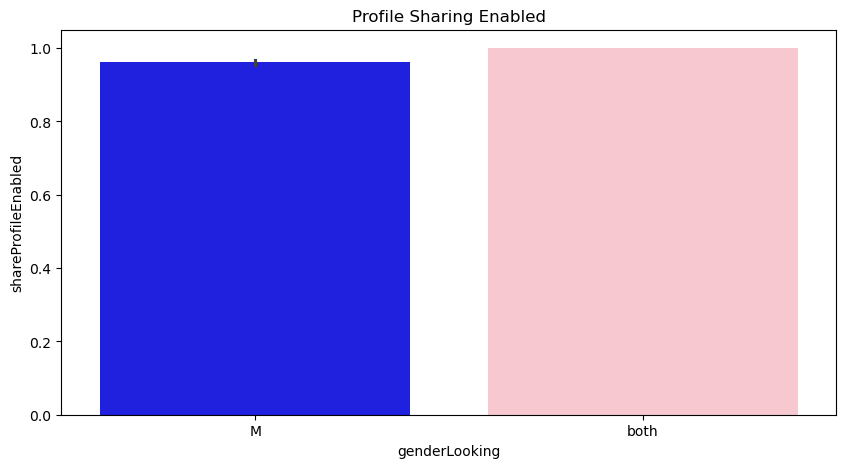

In [55]:
fig, axes = plt.subplots(figsize=(10, 5))

sns.barplot(
    x='genderLooking',
    y='shareProfileEnabled',
    hue='genderLooking',              
    data=loovoo_data,
    palette=['blue', 'pink'],
    legend=False, errorbar=None                      
)

plt.title('Profile Sharing Enabled')
plt.show()

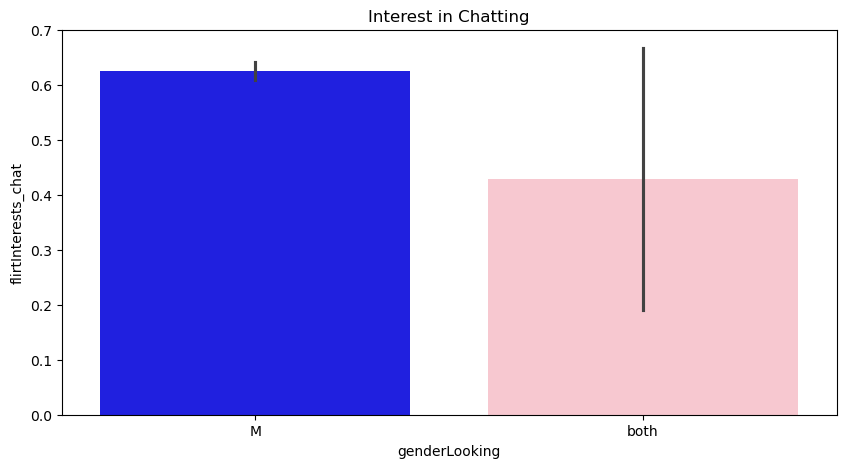

In [57]:
# interest in chatting
fig, axes = plt.subplots(figsize=(10, 5))

sns.barplot(
    x='genderLooking',
    y='flirtInterests_chat',
    hue='genderLooking',             
    data=loovoo_data,
    palette=['blue', 'pink'],
    legend=False, errorbar=None                      
)

plt.title('Interest in Chatting')
plt.show()


We can see a significant difference between Hetero and Bi women with the first group having almost 50% more interest in finding friends than the second. 

Text(0.5, 1.0, 'Interest in finding friends')

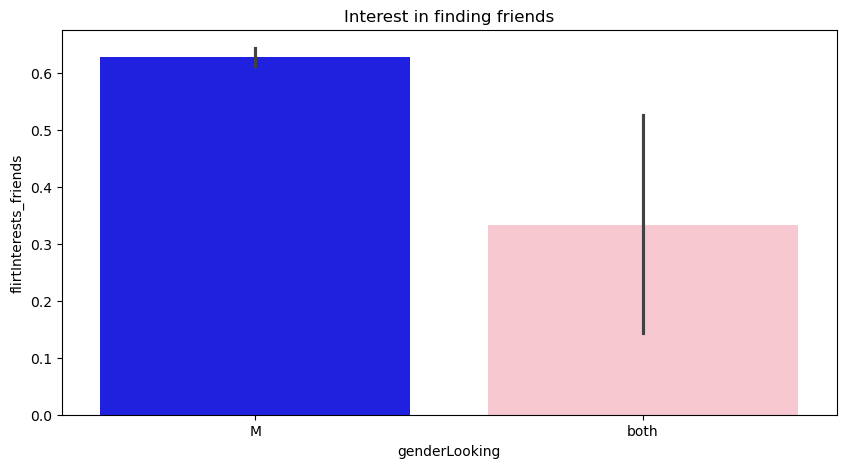

In [58]:
# interest in finding friends
fig, axes = plt.subplots(figsize=(10, 5))

sns.barplot(x='genderLooking', y='flirtInterests_friends', hue='genderLooking',             
    data=loovoo_data,
    palette=['blue', 'pink'],
    legend=False, errorbar=None                   )
plt.title('Interest in finding friends')

This bar chart shows us that Hetero women are interested in finding love more than Bi women. The difference is clearly visible, but not very significant. 

Text(0.5, 1.0, 'Interest in finding love')

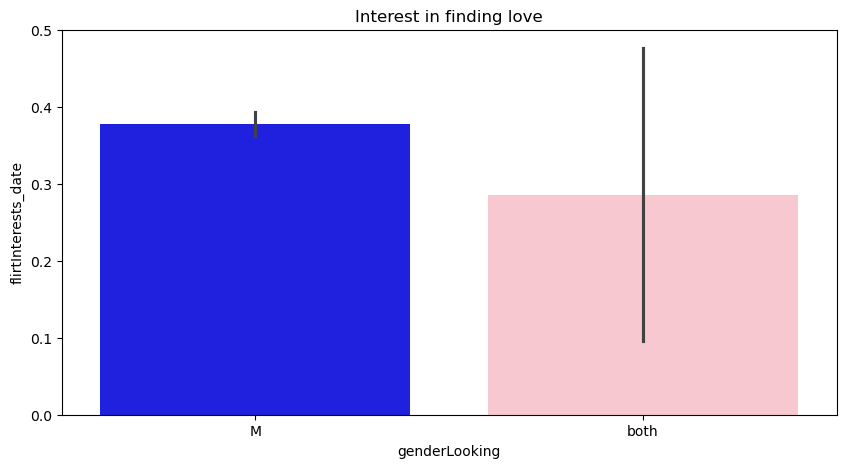

In [60]:
# finding love
fig, axes = plt.subplots(figsize=(10, 5))

sns.barplot(x='genderLooking', y='flirtInterests_date',
    hue='genderLooking',             
    data=loovoo_data,
    palette=['blue', 'pink'],
    legend=False, errorbar=None                   )
plt.title('Interest in finding love')

Let's see which groups of women have more FlirtStars among them. 
And according to the data, we see all FlirtStars in the Hetero women group. 

Text(0.5, 1.0, 'Flirtstars')

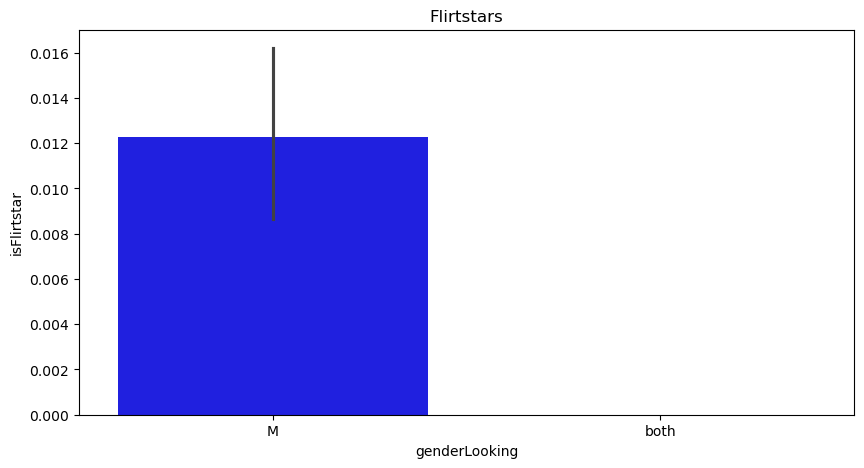

In [61]:
fig, axes = plt.subplots(figsize=(10, 5))

sns.barplot(x='genderLooking', y='isFlirtstar', 
    hue='genderLooking',             
    data=loovoo_data,
    palette=['blue', 'pink'],
    legend=False, errorbar=None                   )
plt.title('Flirtstars')

I was interested to see which groups get more "tokens" like "gifts" and "kisses".
Visualizations below show us that Bi women get more BOTH "gifts" and "kisses" from other Loovoo users. 

Text(0.5, 1.0, 'Gifts received by Bi and Hetero women from other users')

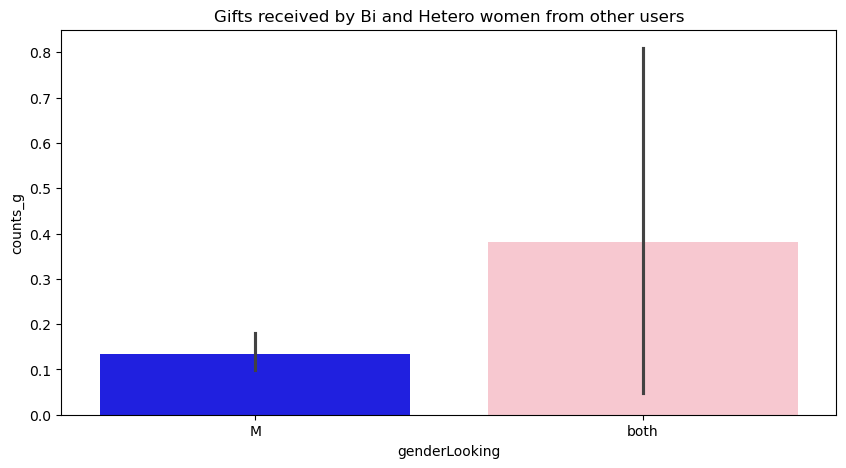

In [62]:
fig, axes = plt.subplots(figsize=(10, 5))

sns.barplot(x='genderLooking', y='counts_g', 
    hue='genderLooking',             
    data=loovoo_data,
    palette=['blue', 'pink'],
    legend=False, errorbar=None                   )
plt.title('Gifts received by Bi and Hetero women from other users')

Text(0.5, 1.0, 'Kisses received by Bi and Hetero women from other users')

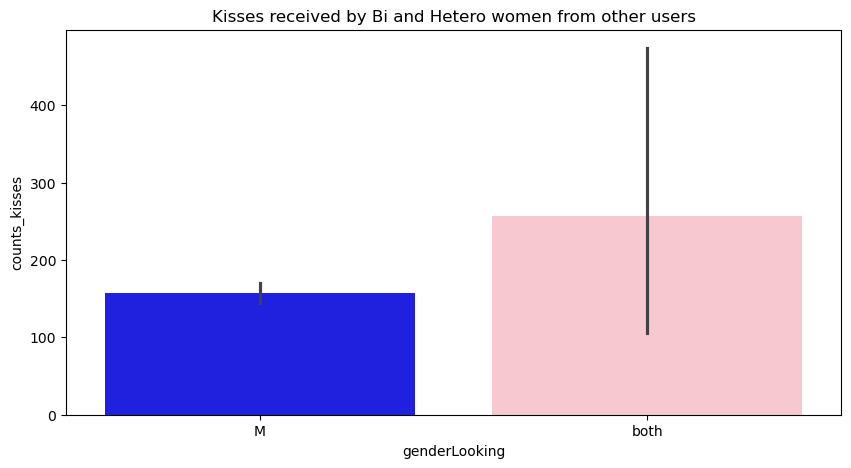

In [63]:
fig, axes = plt.subplots(figsize=(10, 5))

sns.barplot(x='genderLooking', y='counts_kisses', 
    hue='genderLooking',             
    data=loovoo_data,
    palette=['blue', 'pink'],
    legend=False, errorbar=None                   )
plt.title('Kisses received by Bi and Hetero women from other users')

# REFLECTIONS

- While checking the data for missing values, I noticed an interesting detail: 261 missing "city", 12 "location", 46 "distance" inputs in heterosexual women VS just 1 missing "location" in bisexual women's input. While this could suggest lower intentionality or interest among heterosexual women, it's important to be cautious — missing data doesn’t always reflect motivation. Survey fatigue, app design, or defaults may also play a role.

- Analysis showed that most users enable profile sharing. The difference between Bi and Hetero women's profile sharing is noticeable, but not significant, with slightly more Bi women allowing it. This may indicate that bisexual women feel more comfortable being open about their preferences on Loovoo — possibly because the app is perceived as more inclusive or LGBTQ+-friendly. Alternatively, it may reflect a stronger intention to connect or be visible in a smaller dating pool.

- Bi women express less interest in chatting than Hetero women by approximately 2 points. This could support the idea that heterosexual women use the app more for casual or social interaction, as opposed to a strong focus on romantic pursuit.
For bisexual women, lower chat interest may suggest more selective communication or alternative goals for using the app (e.g., dating vs. socializing).

- Hetero women express almost 50% more interest in finding friends than Bi women. This may further support the idea that heterosexual women are using the app as a social platform, not just for dating. For bisexual women, it might suggest a more goal-oriented use of the app — such as romantic relationships, or exploring identity in a safe space.

- Hetero women are more interested in finding love than Bi women. The difference is clearly visible, but not very significant. This could possibly explain the missing “city”, “location” data in Hetero women. They are more interested in chatting online and finding online friends, while Bi women are more interested in offline relationships, which may be harder for them to achieve. That’s why they make sure to have all the important data - like the city - filled in.

- According to the data, we see all FlirtStars in the Hetero women group. It’s not clear what makes a user a FlirtStar - is it the platform or other users define this? But this could suggest that heterosexual women are more visible or active in ways the platform rewards. Or that Loovoo’s FlirtStar algorithm may (intentionally or not) favor certain demographics.

- I was interested to see which group receives more "tokens" like "gifts" and "kisses" on the platform. Analysis shows that Bi women get more BOTH "gifts" and "kisses" from other Loovoo users. Although we can’t see the gender of users who shared these tokens, one possible explanation for the higher number of gifts and kisses received by bisexual women is the gendered difference in gift-giving behavior. In general, women are more likely than men to share gifts with their friends and loved ones. As bisexual women receive attention from both genders, they benefit from receiving more tokens from other women — a group that heterosexual women do not typically interact with on the platform. 
